In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
'''
Density-Based Spatial Clustering of Applications with Noise. 
DBSCAN is anomaly detection algorithm which uses clustering. 

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
https://towardsdatascience.com/how-dbscan-works-and-why-should-i-use-it-443b4a191c80
https://towardsdatascience.com/dbscan-algorithm-complete-guide-and-application-with-python-scikit-learn-d690cbae4c5d
'''

In [2]:
df=pd.read_csv("/Users/randomfuck/Desktop/creditcard.csv")
# ignore the file path, using another laptop

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
from sklearn.preprocessing import StandardScaler
df['normalizedAmount']=StandardScaler().fit_transform(df["Amount"].values.reshape(-1,1))
df=df.drop(["Amount"],axis=1)

In [5]:
x=df.drop(["Class"],axis=1)
y=df["Class"]

In [6]:
y.unique()

array([0, 1])

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=101)

In [8]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5,min_samples=10, algorithm='auto')

In [9]:
dbscan.fit(x_train,y_train)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [10]:
y_pred=dbscan.fit_predict(x_test)

In [11]:
for i in range(len(y_pred)):
    if(y_pred[i]<0):
        y_pred[i]=0
    else:
        y_pred[i]=y_pred[i]

In [12]:
from sklearn.metrics import confusion_matrix,classification_report

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [14]:
cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)

/Users/randomfuck/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix, without normalization
[[71077     0]
 [  125     0]]


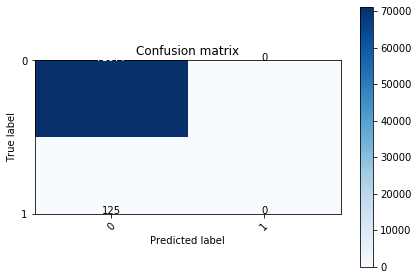

In [15]:
import matplotlib.pyplot as plt
import itertools
plot_confusion_matrix(cm, classes=[0,1])

In [16]:
print(cm)

[[71077     0]
 [  125     0]]


In [17]:
71077/(71077+125)

0.9982444313361984

In [18]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71077
           1       0.00      0.00      0.00       125

    accuracy                           1.00     71202
   macro avg       0.50      0.50      0.50     71202
weighted avg       1.00      1.00      1.00     71202

